In [67]:
from scipy.stats import beta, t
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
def student_t_5(N, T):
    samples = t.rvs(df=5, loc=0.5, scale=0.005, size=(N, T))
    mean = t.mean(df=5, loc=0.5, scale=0.005)
    var = t.var(df=5, loc=0.5, scale=0.005)
    return samples, mean, var

true variance:  4.16666666667e-05
sample variance:  4.10285266629e-05


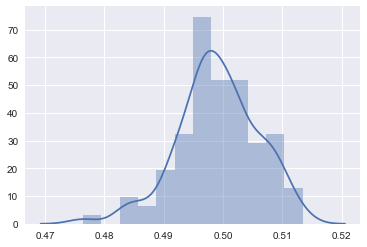

In [69]:
N, T = 100, 10000
delta = 0.99797979798

left, right = 0, 1
a, b = 0.5, 1
# samples = beta.rvs(a=a, b=b, loc=left, scale=right, size=(N, T))
# true_mean = beta.mean(a=a, b=b, loc=left, scale=right)
# true_var = beta.var(a=a, b=b, loc=left, scale=right)

samples, true_mean, true_var = student_t_5(N, T)
print "true variance: ", true_var
print "sample variance: ", np.mean(np.var(samples, axis=0))

ord_stats = np.sort(samples, 0)
sq_ord_stats = np.square(ord_stats)

sns.distplot(ord_stats[:,100])
# sns.distplot(sq_ord_stats[:,100])

upper_envelope = np.array([beta.ppf(q=(1 + delta) / 2.0, a=i, b=N - i + 1) for i in range(1, N + 1)])
lower_envelope = np.array([beta.ppf(q=(1 - delta) / 2.0, a=i, b=N - i + 1) for i in range(1, N + 1)])

0.499027906257
0.249074585501


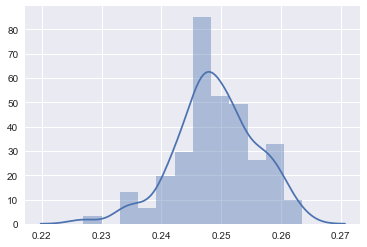

In [70]:
sns.distplot(sq_ord_stats[:,100])
print np.mean(ord_stats[:,100])
print np.mean(sq_ord_stats[:,100])

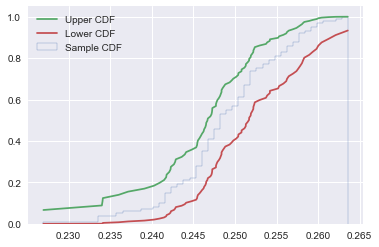

In [71]:
plt.subplot()
samples = sq_ord_stats[:,100]
plt.hist(samples, 50, normed=1, histtype='step', cumulative=True, label='Sample CDF')
plt.plot(samples, upper_envelope, label='Upper CDF')
plt.plot(samples, lower_envelope, label='Lower CDF')
plt.legend(loc='best')

In [72]:
def mean_integral(cdf_values, ord_stats, bound_type='lower'):
    cdf_values = np.hstack((0.0, cdf_values, 1.0))
    samples = np.hstack((0.0, ord_stats, 1.0))
    Fx = cdf_values[:-1]

    if (bound_type == "lower"):
        Fx[0] = Fx[1]

    dx = np.diff(samples)
    mean = 1 - np.sum(np.multiply(Fx, dx))

    return mean

In [78]:
print "Sample variance: ", np.var(ord_stats[:,100])
l_sample_mean = mean_integral(upper_envelope, ord_stats[:,100], bound_type='lower')
print "Lower bound on mean E[X]: ", l_sample_mean
l_sq_sample_mean = mean_integral(upper_envelope, sq_ord_stats[:,100], bound_type='lower')
print "E[X^2]: " + str(l_sq_sample_mean) + " E[X]^2: ", str(np.square(u_sample_mean))
variance = l_sq_sample_mean - np.square(u_sample_mean)
print "Estimated lower variance: ", variance

Sample variance:  4.57342777931e-05
Lower bound on mean E[X]:  0.463947738221
E[X^2]: 0.230657634337 E[X]^2:  0.286553718876
Estimated lower variance:  -0.0558960845386


In [75]:
lower_var = []
upper_var = []

for t in range(T):
    l_sample_mean = mean_integral(upper_envelope, ord_stats[:,t], bound_type='lower')
    l_sq_sample_mean = mean_integral(upper_envelope, sq_ord_stats[:,t], bound_type='lower')
    u_sample_mean = mean_integral(lower_envelope, ord_stats[:,t], bound_type='upper')
    u_sq_sample_mean = mean_integral(lower_envelope, sq_ord_stats[:,t], bound_type='upper')
    
    upper_var.append(u_sq_sample_mean - np.square(l_sample_mean))
    lower_var.append(l_sq_sample_mean - np.square(u_sample_mean))

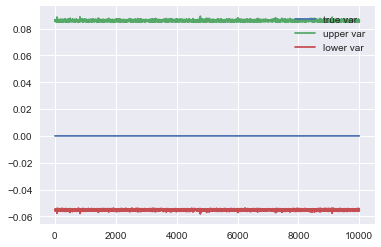

In [76]:
plt.subplot()
plt.plot(range(T), [true_var]*T, label='true var')
plt.plot(range(T), upper_var, label='upper var')
plt.plot(range(T), lower_var, label='lower var')
plt.legend(loc='best')

In [77]:
lower_violations = len(list(filter(lambda x: x > true_var, lower_var)))
upper_violations = len(list(filter(lambda x: x < true_var, upper_var)))
print "Lower violations: ", (lower_violations / (T * 1.0)) * 100.0
print "Upper violations: ", (upper_violations / (T * 1.0)) * 100.0

Lower violations:  0.0
Upper violations:  0.0
